# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

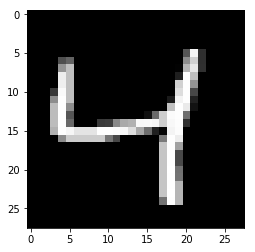

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [6]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]
# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6918
Epoch: 1/20... Training loss: 0.6884
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6793
Epoch: 1/20... Training loss: 0.6734
Epoch: 1/20... Training loss: 0.6668
Epoch: 1/20... Training loss: 0.6580
Epoch: 1/20... Training loss: 0.6475
Epoch: 1/20... Training loss: 0.6374
Epoch: 1/20... Training loss: 0.6246
Epoch: 1/20... Training loss: 0.6122
Epoch: 1/20... Training loss: 0.5947
Epoch: 1/20... Training loss: 0.5798
Epoch: 1/20... Training loss: 0.5609
Epoch: 1/20... Training loss: 0.5463
Epoch: 1/20... Training loss: 0.5233
Epoch: 1/20... Training loss: 0.5107
Epoch: 1/20... Training loss: 0.4936
Epoch: 1/20... Training loss: 0.4767
Epoch: 1/20... Training loss: 0.4537
Epoch: 1/20... Training loss: 0.4430
Epoch: 1/20... Training loss: 0.4210
Epoch: 1/20... Training loss: 0.4081
Epoch: 1/20... Training loss: 0.3950
Epoch: 1/20... Training loss: 0.3836
Epoch: 1/20... Training loss: 0.3669
Epoch: 1/20... Training loss: 0.3688
E

Epoch: 1/20... Training loss: 0.1980
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1988
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1945
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1917
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1898
Epoch: 1/20... Training loss: 0.1956
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1944
E

Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1662
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1582
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1549
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1587
Epoch: 2/20... Training loss: 0.1623
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1598
Epoch: 2/20... Training loss: 0.1608
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1551
E

Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1397
Epoch: 3/20... Training loss: 0.1394
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1375
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1366
Epoch: 3/20... Training loss: 0.1383
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1362
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1379
E

Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1277
Epoch: 4/20... Training loss: 0.1218
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1290
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1273
E

Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1182
E

Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1070
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1138
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1047
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1131
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1076
E

Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1102
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1031
E

Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1039
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1043
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1049
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1018
E

Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1022
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.0998
E

Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1017
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0937
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0948
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.1036
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0934
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.1024
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0972
E

Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.1002
E

Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0927
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0896
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0912
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0977
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0904
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0896
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0987
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0982
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0915
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0972
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0894
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0980
Epoch: 16/20... Training loss: 0.0965
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0987
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0893
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0995
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0985
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0958
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0900
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0882
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0893
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0981
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0974
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0890
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0909
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0970
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

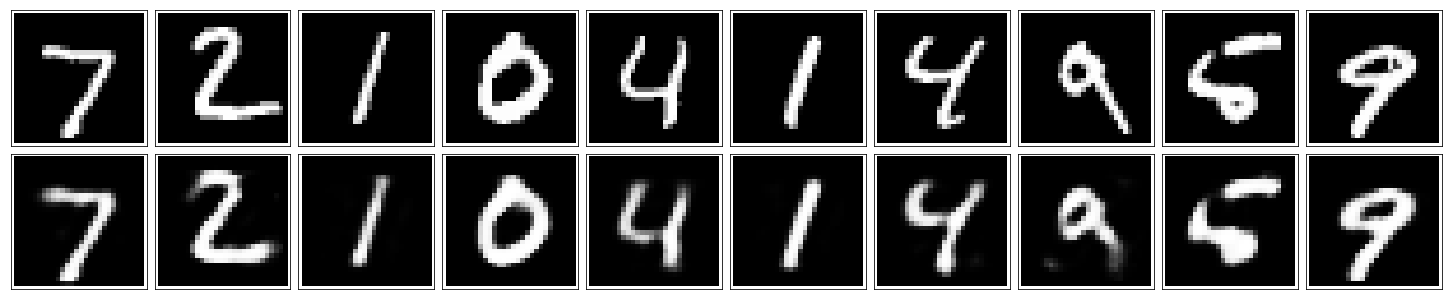

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.